In [1]:
import Levenshtein
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('/Users/fido_josephine/Documents/New-Fraud-Rules/Data/surveys (1).csv')
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
0,ecpb0,178484003,2024-02-05,2024-02-05 09:36:39.000,Peace church,acquahmary574@gmail.com,Packaging,2024-02-05 09:40:44.000,Food Industry,1,0,0,0
1,NaN,844806159,2024-01-29,2024-01-30 23:10:06.000,GBC bank,hensy.ai@gmail.com,Owner,2024-01-30 23:29:41.000,Transportation,1,0,0,0
2,ecpb1,832139937,2024-01-22,2024-01-27 17:15:06.000,ATTA MILLS,arhinm220@gmail.com,DRIVER,2025-02-06 11:16:37.000,Transportation,1,0,1,0
3,ecy1p,279135133,2024-03-04,2024-03-05 21:10:31.000,old karaga street,NaN,accountant,2024-03-05 21:21:50.000,Healthcare,1,0,0,0
4,ebzze,368413062,2024-03-04,2024-03-06 19:42:23.000,Abebrese Street,dadzitheodora77@gmail.com,nurse,2024-03-19 08:52:37.000,Healthcare,1,0,0,0


In [3]:

data['SURVEY_DATE'] = pd.to_datetime(data['SURVEY_DATE'])

# Convert weekly dates into biweekly periods
data['SURVEY_MONTH'] = data['SURVEY_DATE'].dt.to_period("M")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380461 entries, 0 to 380460
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   HASH          354248 non-null  object        
 1   CLIENT_ID     380461 non-null  int64         
 2   SURVEY_WEEK   380461 non-null  object        
 3   SURVEY_DATE   380461 non-null  datetime64[ns]
 4   ADDRESS       380249 non-null  object        
 5   EMAIL         269941 non-null  object        
 6   POSITION      354927 non-null  object        
 7   DISB_DATE     177915 non-null  object        
 8   INDUSTRY      354961 non-null  object        
 9   DISBURSED     380461 non-null  int64         
 10  DR1           380461 non-null  int64         
 11  DEFAULTED     380461 non-null  int64         
 12  PTFRAUD       380461 non-null  int64         
 13  SURVEY_MONTH  380461 non-null  period[M]     
dtypes: datetime64[ns](1), int64(5), object(7), period[M](1)
memory usage

In [4]:
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,SURVEY_MONTH
0,ecpb0,178484003,2024-02-05,2024-02-05 09:36:39,Peace church,acquahmary574@gmail.com,Packaging,2024-02-05 09:40:44.000,Food Industry,1,0,0,0,2024-02
1,NaN,844806159,2024-01-29,2024-01-30 23:10:06,GBC bank,hensy.ai@gmail.com,Owner,2024-01-30 23:29:41.000,Transportation,1,0,0,0,2024-01
2,ecpb1,832139937,2024-01-22,2024-01-27 17:15:06,ATTA MILLS,arhinm220@gmail.com,DRIVER,2025-02-06 11:16:37.000,Transportation,1,0,1,0,2024-01
3,ecy1p,279135133,2024-03-04,2024-03-05 21:10:31,old karaga street,NaN,accountant,2024-03-05 21:21:50.000,Healthcare,1,0,0,0,2024-03
4,ebzze,368413062,2024-03-04,2024-03-06 19:42:23,Abebrese Street,dadzitheodora77@gmail.com,nurse,2024-03-19 08:52:37.000,Healthcare,1,0,0,0,2024-03


In [5]:
data['ADDRESS'] = data['ADDRESS'].str.lower()

In [6]:
data['DR1'].sum()

np.int64(33954)

In [7]:
data['DEFAULTED'].sum()

np.int64(3329)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380461 entries, 0 to 380460
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   HASH          354248 non-null  object        
 1   CLIENT_ID     380461 non-null  int64         
 2   SURVEY_WEEK   380461 non-null  object        
 3   SURVEY_DATE   380461 non-null  datetime64[ns]
 4   ADDRESS       380249 non-null  object        
 5   EMAIL         269941 non-null  object        
 6   POSITION      354927 non-null  object        
 7   DISB_DATE     177915 non-null  object        
 8   INDUSTRY      354961 non-null  object        
 9   DISBURSED     380461 non-null  int64         
 10  DR1           380461 non-null  int64         
 11  DEFAULTED     380461 non-null  int64         
 12  PTFRAUD       380461 non-null  int64         
 13  SURVEY_MONTH  380461 non-null  period[M]     
dtypes: datetime64[ns](1), int64(5), object(7), period[M](1)
memory usage

In [9]:
data.SURVEY_WEEK

0         2024-02-05
1         2024-01-29
2         2024-01-22
3         2024-03-04
4         2024-03-04
             ...    
380456    2024-09-02
380457    2024-10-07
380458    2024-09-30
380459    2024-09-23
380460    2024-11-11
Name: SURVEY_WEEK, Length: 380461, dtype: object

In [10]:
import sys
sys.path.append('/Users/fido_josephine/Documents/New-Fraud-Rules/fraud')
from modules.distance_finder import  lev_dist2,  lev_dist4

In [11]:
from Levenshtein import distance as lev_distance

In [12]:
# def lev_dist1(df, hash, week, address):
#     rows = []

#     # Step 1: Group addresses by HASH and SURVEY_WEEK
#     grouped = df.groupby([hash, week])[address].apply(list).reset_index()
#     return grouped
# add_dup = lev_dist3(data=data, lev_distance = lev_distance)

In [13]:
# print(add_dup)

In [14]:
bool_columns = ['DISBURSED', 'DR1']
result = lev_dist4(data=data, lev_distance = lev_distance,period = 'SURVEY_MONTH' , bool_columns = bool_columns)

In [15]:
print(result)

         HASH SURVEY_MONTH                               ADDRESS  COUNT  \
0       6gg6h      2024-06                         seikwa box 94      1   
1       6gg7r      2024-09                          abura clinic      1   
2       6vmj3      2024-01                       adenta fafaraha      1   
3       7ff38      2024-11                              apple st      1   
4       7hfq5      2024-11                       kpone katamanso      1   
...       ...          ...                                   ...    ...   
319327  ww0wp      2024-04                        salvation army      1   
319328  xcnyk      2024-07  mp building,the name of mp is mutaka      1   
319329  xn0wd      2024-08         adjacent joduro international      1   
319330  xn775      2024-02                        nii dam street      1   
319331  y2s08      2024-02                  sda hospital kwadaso      1   

        DISBURSED  DR1  
0               0    0  
1               0    0  
2               0    0  

## BiWeekly Aggregation

In [16]:
df = data.copy()
df['SURVEY_WEEK'] = pd.to_datetime(df['SURVEY_WEEK'])

# Convert weekly dates into biweekly periods
df['biweekly_period'] = df['SURVEY_WEEK'].dt.to_period("2W")

In [17]:
result2 = lev_dist4(data=df, lev_distance = lev_distance,period='SURVEY_MONTH',   bool_columns = bool_columns)

In [18]:
print(result2)
result2.head()

         HASH SURVEY_MONTH                               ADDRESS  COUNT  \
0       6gg6h      2024-06                         seikwa box 94      1   
1       6gg7r      2024-09                          abura clinic      1   
2       6vmj3      2024-01                       adenta fafaraha      1   
3       7ff38      2024-11                              apple st      1   
4       7hfq5      2024-11                       kpone katamanso      1   
...       ...          ...                                   ...    ...   
319327  ww0wp      2024-04                        salvation army      1   
319328  xcnyk      2024-07  mp building,the name of mp is mutaka      1   
319329  xn0wd      2024-08         adjacent joduro international      1   
319330  xn775      2024-02                        nii dam street      1   
319331  y2s08      2024-02                  sda hospital kwadaso      1   

        DISBURSED  DR1  
0               0    0  
1               0    0  
2               0    0  

,HASH,SURVEY_MONTH,ADDRESS,COUNT,DISBURSED,DR1
0,6gg6h,2024-06,seikwa box 94,1,0,0
1,6gg7r,2024-09,abura clinic,1,0,0
2,6vmj3,2024-01,adenta fafaraha,1,0,0
3,7ff38,2024-11,apple st,1,0,0
4,7hfq5,2024-11,kpone katamanso,1,0,0


In [19]:
result2['COUNT'].max()

np.int64(27)

In [20]:
result2['DR1'].sum()

np.int64(31899)

In [21]:
output = result2.groupby('COUNT').agg(
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum)
).reset_index()
output['ndefaults'].sum()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_34792/1959181543.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  output = result2.groupby('COUNT').agg(


np.int64(31899)

In [22]:
output

,COUNT,nloans,ndefaults
0,1,137869,25537
1,2,16999,3519
2,3,5590,1239
3,4,2600,567
4,5,1451,373
5,6,761,169
6,7,568,153
7,8,280,80
8,9,190,49
9,10,171,38


In [23]:
from modules.group_dr import add_chart, add_bplots

/Users/fido_josephine/Documents/New-Fraud-Rules/fraud/modules/group_dr.py:16: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = summary.groupby(['COUNT']).agg(


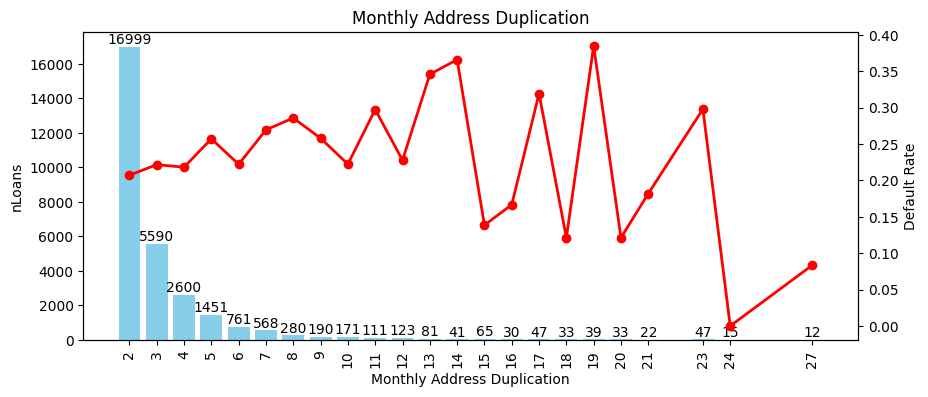

In [24]:
plot1 = add_chart(data=result2, title= 'Monthly Address Duplication')

In [25]:
from modules.distance_finder import  lev_dist_with_fields

In [26]:
df['POSITION'] = df['POSITION'].str.lower()

In [27]:
grouped = lev_dist_with_fields(data=df, lev_distance = lev_distance,period = 'SURVEY_MONTH' , bool_columns = bool_columns, text_columns=None)

In [28]:
grouped.head()

,HASH,SURVEY_MONTH,ADDRESS,INDUSTRY,POSITION,COUNT,DISBURSED,DR1
0,6gg6h,2024-06,seikwa box 94,Construction,forman,1,0,0
1,6gg7r,2024-09,abura clinic,Legal,monitoring and evaluation officer,1,0,0
2,6vmj3,2024-01,adenta fafaraha,UNKNOWN,UNKNOWN,1,0,0
3,7ff38,2024-11,apple st,Education,im a kente weaver,1,0,0
4,7hfq5,2024-11,kpone katamanso,Construction,mechanic,1,0,0


/Users/fido_josephine/Documents/New-Fraud-Rules/fraud/modules/group_dr.py:16: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = summary.groupby(['COUNT']).agg(


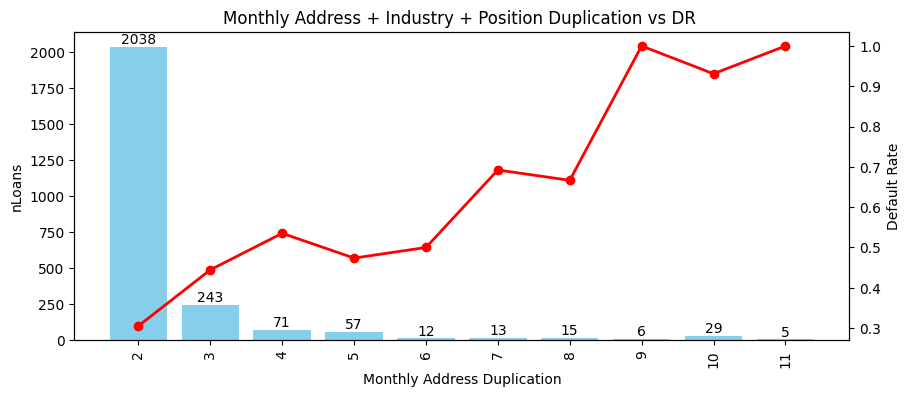

In [29]:
plot2 = add_chart(grouped, 'Monthly Address + Industry + Position Duplication vs DR ')

## Aggregations

In [30]:
# Address Dups

In [53]:
res = result2[result2['COUNT'] > 6]
aggs = res.groupby('SURVEY_MONTH').agg(
    loans = ('DISBURSED', sum),
    dr = ('DR1', sum)
)
aggs

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_34792/797394082.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggs = res.groupby('SURVEY_MONTH').agg(


,loans,dr
SURVEY_MONTH,,
2024-01,103,17
2024-02,79,16
2024-03,80,13
2024-04,108,18
2024-05,127,26
2024-06,158,32
2024-07,257,58
2024-08,198,68
2024-09,172,63


In [54]:
aggs['loans'].mean()

np.float64(159.0)

In [55]:
aggs['dr'].mean()

np.float64(41.25)

In [33]:
dr = res['DR1'].sum()
dr/loans

np.float64(0.23095044679122664)

In [68]:
res2 = grouped[grouped['COUNT'] > 6]
aggs2 = res2.groupby('SURVEY_MONTH').agg(
    loans = ('DISBURSED', sum),
    dr = ('DR1', sum)
)
aggs2

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_34792/176116930.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggs2 = res2.groupby('SURVEY_MONTH').agg(


,loans,dr
SURVEY_MONTH,,
2024-02,6,6
2024-06,2,2
2024-07,4,1
2024-08,16,9
2024-09,11,11
2024-11,10,10
2024-12,19,18


In [69]:
aggs2['loans'].mean()

np.float64(9.714285714285714)

In [70]:
aggs2['dr'].mean()

np.float64(8.142857142857142)